# **Titanic: Data Science - Machine Learning**

Provovido por [kaggle.com ](https://www.kaggle.com/) (uma das maiores e mais conhecidas plataformas para competições de Data Science) o *dataset* do Titanic é conhecido como um *Hello World* do mundo da Ciência de Dados.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na **morte de 1502 dos 2224** passageiros e tripulantes.

Embora houvessem alguns elementos estocásticos, como fatores climáticos, parece que alguns grupos de pessoas eram mais propensas a sobreviver do que outras.

![Titanic](img/titanic.jpg)


# 1. Definição do Problema

Construir um modelo preditivo que responda à pergunta: **“que tipo de pessoas têm maior probabilidade de sobreviver?”** Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).


# 2. Obtenção dos Dados

Os *datasets* para este problema podem ser obtidos na própria [kaggle](https://www.kaggle.com/c/titanic/data) e estão divididos em dois grupos:

Dados de treinamento (`train.csv`):

*   Deve ser utilizado para "alimentar" o modelo de *machine learning*
*   Fornece resultado (se o passageiro sobreviveu ou não)

Dados de teste (`test.csv`):

*   Deve ser utilizado para validar o modelo
*   Não é informado se o passageiro morreu ou não

Também é disponibilizado uma solução exemplo (`gender_submission.csv`) de como uma submissão deve ser feita.

In [3]:
# Import das bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None # para visualizacao de todas as colunas

# visualizacao dos graficos direto no notebook
%matplotlib inline 

In [4]:
# carregar o dataset de treino
train_ds = pd.read_csv('dataset/train.csv')

In [5]:
# carregar o dataset de teste
test_ds = pd.read_csv('dataset/test.csv')

### Na sequência podemos verificar as dimensões da matriz/dataset de treino

In [7]:
print("Features: " + str(train_ds.shape[1]) + " Lines: " + str(train_ds.shape[0]))

Features: 12 Lines: 891


# 3. Exploração dos Dados

É necessário saber quais os tipos de cada feature, o que ela representa, quantidade de itens faltantes e tipo de distribuição.

In [8]:
# Tipo de cada variavel
display(train_ds.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# ver os 5 primeiros registros
display(train_ds.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Porcentagem de valores faltantes
(train_ds.isnull().sum()/train_ds.shape[0]).sort_values()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

### Breve análise de cada feature

* **PassengerId** = Inteiro, identificador de cada passageiro - Chave Primária
* **Survived** = Inteiro, variável que informa se o passageiro sobreviveu ou não ao desastre - Target
* **Pclass** = Inteiro, variável que determina a classe do bilhete do passageiro - Discreta
* **Name** = String, nome do passageiro - Categórica
* **Sex** = String, sexo do passageiro - Categórica
* **Age** = Float (?), idade do passaegiro - Continua
* **SibSp** = Inteiro, quantidade de cônjuge e irmãos a bordo - Discreta
* **Parch** = Inteiro, Quantidade de pais e filhos a bordo - Discreta
* **Ticket** String, Informações sobre o bilhete do passageiro - Categórica
* **Fare** = Float, Preço pago pelo bilhete - Contínua
* **Cabin** = String, Número da cabite do passageiro - Categórica
* **Embarked** = String, Local de embarque - C: Cherbourg, Q: Queenstown, S: Southampton

Cabin é a variavel com mais valores faltantes (77%), logo após a variável Age (19%) seguida por Embarked (2%).

### Distribuição estatística dos dados

In [15]:
train_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Histograma das variáveis numéricas

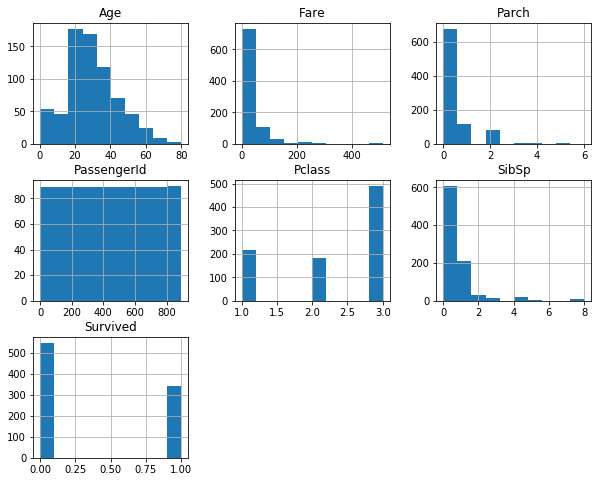

In [21]:
train_ds.hist(figsize=(10,8));

### Verificar correlação entre sexo e probabilidade de sobreviver

In [22]:
train_ds[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


### Verificar, através de gráficos, a correlação entre sexo, classe e onde embarcou, com a chance de sobrevivência (Categóricas)

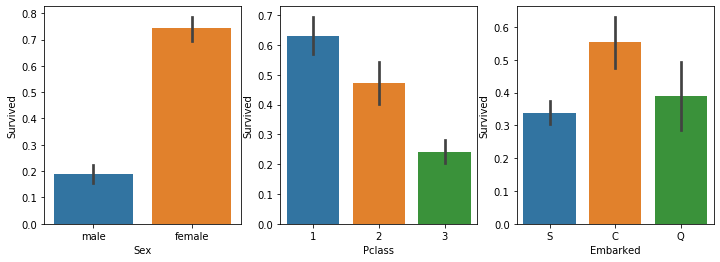

In [27]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(12,4))


sns.barplot(x='Sex', y='Survived', data=train_ds, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train_ds, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train_ds, ax=axis3);


De antemão, pode-se deduzir que pessoas da primeira classe tiveram mais chances de sobreviver e que também pessoas que embarcaram em Cherbourg também tiveram, ligeiramente, suas chances de sobrevivência incrementadas.

### Verificar influência da idade na chance de sobrevivência

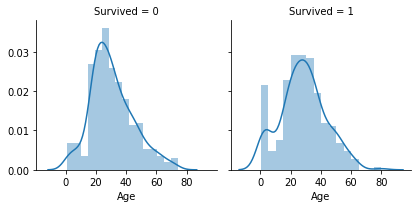

In [29]:
age_survived = sns.FacetGrid(train_ds, col='Survived')
age_survived.map(sns.distplot, 'Age');

### Scatter plot

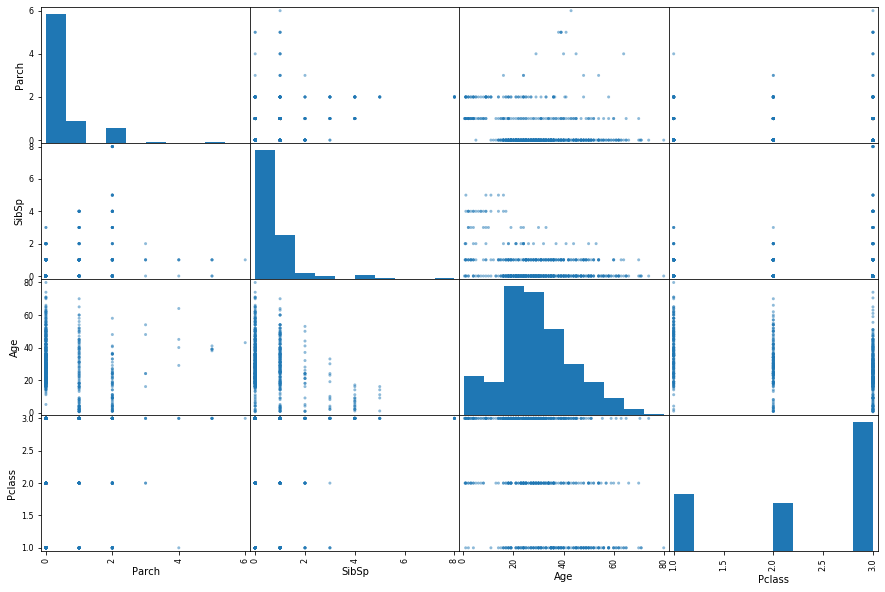

In [31]:
# scatter matrix plot
col=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train_ds[col], figsize=(15,10));

### Heatmap

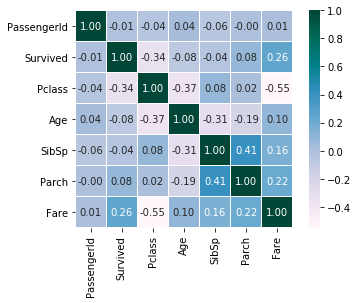

In [36]:
# heatmap plot para variáveis numéricas
sns.heatmap(train_ds.corr(), 
            cmap='PuBuGn', 
            fmt='.2f', 
            linewidths=0.08,
            vmax=1.0,
            square=True,
            linecolor='white',
            annot=True);

In [38]:
train_ds.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Barah, Mr. Hanna Assi",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


Pode-se observar que:
* Name é unico
* Não há valores faltantes para Sex e Name
* Há apenas dois sexos, e a frequencia de másculino é de 577 de 891 = 65%
* O porto de qual mais passageiros embarcaram é Southampto (há 2 registros faltantes apenas)